Задание:  
а. Нормализовать признак - median_income  
б. Привести признак - population к масштабу от 0 до 100  

**Заполнение пропусков: **

а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity.  
Например, если пропущено значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

**Категорийные атрибуты: **

а. Посчитать среднее кол-во комнат в строке (total_rooms/households)  
б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import Image
from sklearn import preprocessing
import numpy as np

In [3]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Задание:
a. Нормализовать признак - median_income

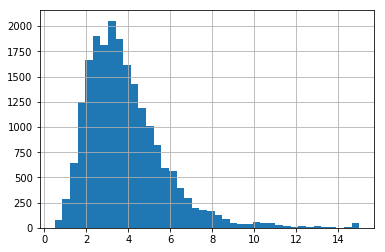

In [4]:
housing['median_income'].hist(bins=40)

In [5]:
scaler = preprocessing.MinMaxScaler()
housing['median_income_normalize'] = scaler.fit_transform(housing[['median_income']])

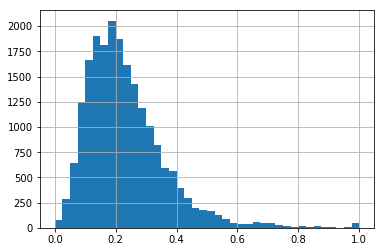

In [6]:
housing['median_income_normalize'].hist(bins=40)

#### Задание:
б. Привести признак - population к масштабу от 0 до 100

In [7]:
scalerPop = preprocessing.MinMaxScaler(feature_range=[0,100])
housing['population_normalize'] = scalerPop.fit_transform(housing[['population']])

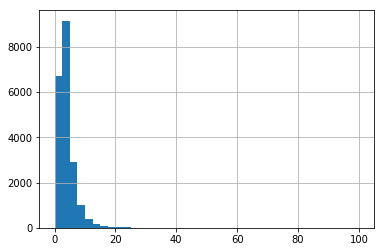

In [8]:
housing['population_normalize'].hist(bins=40)

#### Задание:
а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity. 
Например, если пропущено значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [9]:
# Количество незаполненных значений
housing['total_bedrooms'].isnull().sum()

207

In [10]:
housing.groupby('ocean_proximity')['total_bedrooms'].mean()

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

In [11]:
housing['total_bedrooms'] = \
housing.groupby('ocean_proximity')['total_bedrooms'].transform(lambda x: x.fillna(x.mean))

Проверим все ли значения заполнены теперь

In [12]:
housing['total_bedrooms'].isnull().sum()

0

#### Задание:
а. Посчитать среднее кол-во комнат в строке (total_rooms/households)

In [14]:
housing['means_rooms_households'] = round(housing['total_rooms']/housing['households'])

#### Задание:
б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [16]:
housing['rooms_bin'] = housing['means_rooms_households'] \
.apply(lambda x: '<5' if x < 5 else '5-6' if x < 7 else '>6')

In [18]:
housing['rooms_bin'].value_counts()

5-6    11894
<5      5513
>6      3233
Name: rooms_bin, dtype: int64

In [25]:
housing['rooms_bin2'] = pd.cut(housing['means_rooms_households'], bins = [0,1,2,3,4,5,6,7,8,150], \
                              labels = ['1 комната', '2 комнаты', '3 комнаты', '4 комнаты', '5 комнат', \
                                        '6 комнат', '7 комнат', '8 комнат', 'больше 10 комнат'])

In [27]:
housing['rooms_bin2'].value_counts()

5 комнат            6728
6 комнат            5166
4 комнаты           4333
7 комнат            2048
3 комнаты           1012
8 комнат             731
больше 10 комнат     454
2 комнаты            159
1 комната              9
Name: rooms_bin2, dtype: int64